In [2]:
'''

##Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

The fundamental idea behind ensemble techniques is that by combining multiple learning models (often called “base learners”), we can achieve better predictive performance than any single model alone. In essence, the ensemble leverages the diversity among individual learners (different errors, different perspectives) to reduce overall error and improve robustness and generalization.

In this context, bagging (bootstrap aggregating) and boosting are two popular ensemble approaches—and they differ significantly in both approach and objective:

Bagging trains multiple base learners independently and in parallel, each on a different random subset of the training data (drawn with replacement). Then the predictions are aggregated (by averaging for regression or majority‐vote for classification). The key goal is to reduce variance (i.e., make the model more stable and less sensitive to fluctuations in the training set).

Boosting builds learners sequentially, where each new model places more focus on the instances that previous models misclassified (or predicted poorly). The learners are combined (often in a weighted sum or vote) in a way that emphasizes strong performers. The goal is to reduce bias (i.e., improve the model’s ability to fit the underlying pattern) and often also variance by gradually refining the fit.

In short: bagging is about “many independent models to stabilize the outcome,” while boosting is about “many dependent models to progressively correct errors and boost performance.”

##Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

The ensemble method RandomForestClassifier (RF) reduces over-fitting compared to a single decision tree by introducing two forms of randomness and then aggregating results. First, each tree is built on a different bootstrap sample of the data (bagging), so they do not all learn the exact same irregularities in the training set.

 Second, at every split in each tree, RF selects a random subset of features rather than all features—this helps ensure that trees are less correlated and reduces the tendency to latch onto spurious features.

 When the predictions from many trees are averaged (or majority-voted in classification), variance drops and the ensemble generalises better than any one over-complex tree.

Two key hyper-parameters that play a major role in controlling over-fitting are:

max_features: This parameter controls how many features are considered for each split in a tree. By limiting this (for example to the square root of total features) you force each tree to use different features and thus introduce diversity; this reduces over-fitting because no single feature dominates all trees.

max_depth (or alternatively min_samples_leaf / min_samples_split): These parameters limit how deep each individual tree can grow or ensure leaves have a minimum number of samples. Constraining tree size prevents individual trees from becoming overly complex and fitting noise in the training data.


Together, by building many moderately constrained trees on different random data/feature subsets and aggregating, RF achieves lower variance and avoids the “perfect-fit to training noise” trap that single, deep decision trees often fall into.


##Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Stacking (sometimes called stacked generalization) is an ensemble-learning method in which you train multiple different models (called base learners) and then train a meta-learner on the outputs of those base learners to make a final prediction.


How it differs from traditional bagging/boosting:

In bagging and boosting, the base learners are typically of the same type (homogeneous models) and combined either by simple averaging/voting (bagging) or sequential error-correction (boosting).


In stacking you often use heterogeneous models (e.g., a decision tree, a support vector machine, a neural network) as base learners.

Moreover, stacking learns a meta-model that learns how to combine the base learner outputs rather than applying a fixed rule.

Simple example use-case:
Imagine you are classifying whether emails are spam. You train three different base models:

Model A: logistic regression on word features

Model B: random forest on metadata (sender, time, attachments)

Model C: neural network on embedding representations of the email text
Once they are trained, you run them on a validation set and collect their predictions (for each email you now have three probabilities). Then you train a meta-learner (say a simple logistic regression) that takes those three predictions as input and outputs the final spam / non-spam decision. Because each base model captures different aspects of the data and the meta-learner figures out how to weight/interpret them, the stacked model can outperform any single base model.

In summary: stacking builds a composite of different model types and uses a learned combiner to exploit their complementary strengths, whereas bagging and boosting focus on multiple instances of (usually) the same model type and combine them by voting or sequential correction.

##Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

The “out-of-bag” (OOB) score in a Random Forest Classifier is an internal measure of how well the model is likely to perform on unseen data, without requiring a separate validation set.

What it is

When you build a random forest, each tree is trained on a bootstrap sample of the training data (sampling with replacement). As a consequence, roughly one-third of the original training samples are not used in the creation of a given tree — those are the “out-of-bag” (OOB) samples for that tree.

For each training example, you look at the subset of trees that did not include that example in their bootstrap training. Those trees make predictions for that example, and you compare the aggregated prediction to the true label. Aggregating across all examples gives the OOB score (e.g., OOB accuracy).

Why it is useful

It effectively acts as a built-in validation mechanism: you get an estimate of generalisation error without having to set aside a separate validation or hold-out set.


Because each example is evaluated only by trees that didn’t train on it, the OOB estimate is less biased by the training fit and gives a more realistic assessment of performance on unseen data.
parthshukla.me

It helps when data is limited: you can use all of your data for training and still get an unbiased-ish performance estimate.
Mohammad Rafiqul Islam

How it helps in model evaluation without a separate validation set

Instead of splitting off a portion of your training data solely for validation, the OOB mechanism uses the “left-out” samples for each tree as a pseudo test set. Because the forest is large and each sample is left out for a subset of trees, each sample gets predictions from models that never saw it. Aggregating those gives you a performance metric. Since you did not hold back any part of the data exclusively for validation, you maximise training data while still estimating generalisation.
data-science-notes.henrydashwood.com

In summary, the OOB score is a convenient, built-in estimate of generalisation for Random Forests — giving you a performance metric without sacrificing data to a separate validation split.


##Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Here’s a comparison between AdaBoost and Gradient Boosting in terms of how they handle errors from weak learners, how they adjust weights (or equivalent), and typical use-cases:

How they handle errors from weak learners

AdaBoost builds weak learners sequentially and after each one, it looks at which training instances were misclassified. The next learner then focuses more on those “hard” instances.


Gradient Boosting also builds learners sequentially, but instead of re-weighting individual samples explicitly, it fits each new learner to the residual errors (or the negative gradients of the loss) of the current ensemble’s predictions. In effect, each new learner tries to correct whatever error remains.

Weight adjustment mechanism

In AdaBoost, the mechanism is a sample-weighting scheme: misclassified points receive higher weights (so the next weak learner gives them more attention), and correctly classified points receive lower weights. The final output is a weighted majority (or sum) of weak learners.


In Gradient Boosting, there is no explicit sample-weight rebalancing of the training set; instead the model computes residuals (or gradients) from previous predictions and fits a new weak learner to those. The contribution of each learner is added (often with a learning-rate shrinkage) to the ensemble.


Typical use cases

AdaBoost works well when you have a relatively clean dataset (not too noisy or many outliers), where you want a simpler boosting method and you are using mainly classification with simple base learners (e.g., decision stumps). It’s relatively lightweight.
Medium

Gradient Boosting is preferred when the relationships are more complex (non-linear, many features), when you may want to optimize a flexible loss function (classification, regression, ranking) and can afford more tuning and more computational cost. It tends to handle noise and complex patterns better (with appropriate regularization) than AdaBoost.

##Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.


The ensemble algorithm CatBoost excels at handling categorical features with minimal preprocessing for a few key reasons:

Native categorical support
Rather than requiring you to manually one-hot-encode or label-encode each categorical variable, CatBoost allows you simply to pass in which features are categorical (via the cat_features parameter). The library then applies internal transformations suited to both low- and high-cardinality categories.


Ordered target statistics / encoding
For categorical features with many unique values, CatBoost uses a special target-based encoding scheme that avoids the common pitfall of “target leakage”. It computes statistics for each category in a way that only relies on past (in permutation) observations, thus preventing the model from cheating by learning from future information.


Smart trade-off between one-hot and aggregated encoding
For categorical features that have relatively few unique values, CatBoost may still apply one-hot encoding; for those with many levels, it will use the aggregated target-statistic encoding instead. This flexibility helps it avoid the high-dimensional sparsity blow-up of one-hot encoding on high-cardinality features.

Built-in mechanisms to reduce bias / overfitting from encoding
Because encoding category levels based on target can easily lead to overfitting—especially when some categories appear rarely—CatBoost’s ordered boosting and ordered target statistics safeguard the model’s generalisation on categorical data.

Because of these features, CatBoost often performs very well on datasets with many categorical variables or very high‐cardinality categories, and it reduces the manual burden and risk of introducing encoding‐based errors or biases.

'''


'\n\n##Question 1 : What is the fundamental idea behind ensemble techniques? How does \nbagging differ from boosting in terms of approach and objective? \n\nThe fundamental idea behind ensemble techniques is that by combining multiple learning models (often called “base learners”), we can achieve better predictive performance than any single model alone. In essence, the ensemble leverages the diversity among individual learners (different errors, different perspectives) to reduce overall error and improve robustness and generalization.\n\nIn this context, bagging (bootstrap aggregating) and boosting are two popular ensemble approaches—and they differ significantly in both approach and objective:\n\nBagging trains multiple base learners independently and in parallel, each on a different random subset of the training data (drawn with replacement). Then the predictions are aggregated (by averaging for regression or majority‐vote for classification). The key goal is to reduce variance (i.e

In [5]:
'''Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions. '''

#Load the dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

#Split data into 70% train and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

#Train a KNN classifier (default K = 5) without scaling, evaluate:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Without scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

#Apply StandardScaler, retrain KNN, compare metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("=== With StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled, target_names=target_names))

#Use GridSearchCV to find the best K (1 to 20) and distance metric (Euclidean, Manhattan)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1,21)),
    'metric': ['euclidean', 'manhattan']
}

knn_for_grid = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn_for_grid,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best parameters found:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

#Train the optimized KNN and compare results with the unscaled / scaled versions
best_k = grid.best_params_['n_neighbors']
best_metric = grid.best_params_['metric']

knn_opt = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_opt.fit(X_train_scaled, y_train)
y_pred_opt = knn_opt.predict(X_test_scaled)

print("=== Optimized KNN (scaled data) ===")
print("Using K =", best_k, "metric =", best_metric)
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt, target_names=target_names))


=== Without scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

=== With StandardScaler ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11}
Best cross-val

Original shape: (569, 30)


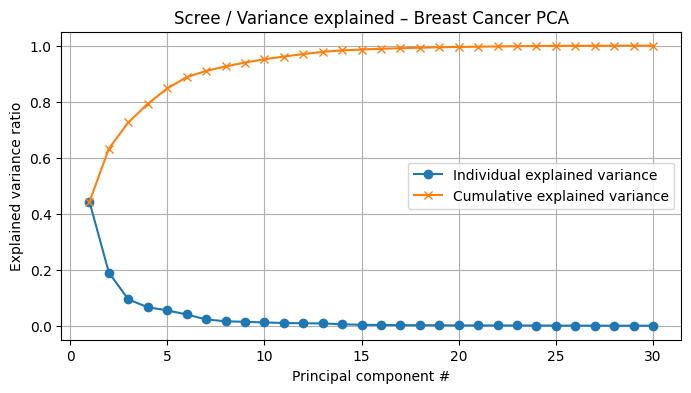

Number of components to retain ~95% variance: 10
Shape after PCA: (569, 10)
Accuracy on original data: 0.9707602339181286
Classification report (original data):
               precision    recall  f1-score   support

   malignant       1.00      0.92      0.96        64
      benign       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy on PCA‐transformed data: 0.9473684210526315
Classification report (PCA data):
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



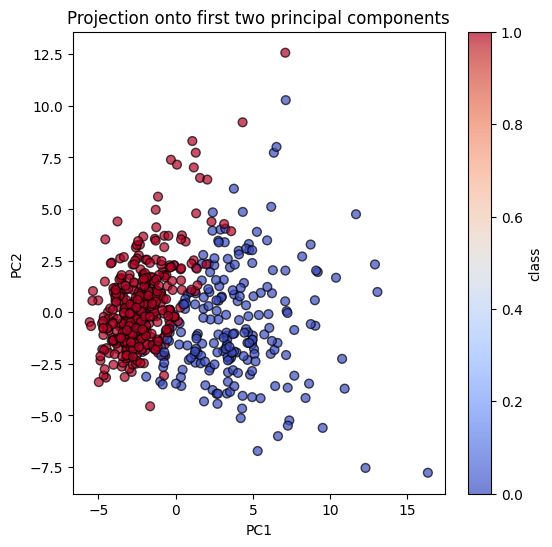

In [6]:
'''Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class). '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Original shape:", X.shape)  # e.g., (569, 30) :contentReference[oaicite:3]{index=3}

# 2. Scale data (important for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), explained, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative)+1), cumulative, marker='x', label='Cumulative explained variance')
plt.xlabel('Principal component #')
plt.ylabel('Explained variance ratio')
plt.title('Scree / Variance explained – Breast Cancer PCA')
plt.legend()
plt.grid(True)
plt.show()

# 4. Retain enough components to cover ~95% variance
n_components_95 = np.argmax(cumulative >= 0.95) + 1
print("Number of components to retain ~95% variance:", n_components_95)

pca2 = PCA(n_components=n_components_95)
X_pca = pca2.fit_transform(X_scaled)
print("Shape after PCA:", X_pca.shape)

# Split data for two cases: original & PCA-transformed
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y,
                                                               test_size=0.30,
                                                               random_state=42,
                                                               stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y,
                                                 test_size=0.30,
                                                 random_state=42,
                                                 stratify=y)

# 5. Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("Accuracy on original data:", acc_orig)
print("Classification report (original data):\n", classification_report(y_test, y_pred_orig, target_names=data.target_names))

# 6. Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA‐transformed data:", acc_pca)
print("Classification report (PCA data):\n", classification_report(y_test, y_pred_pca, target_names=data.target_names))

# 7. Visualise first two principal components
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', s=40, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto first two principal components')
plt.colorbar(label='class')
plt.show()

MSE (Euclidean, K=5): 4788.464778493446
MSE (Manhattan, K=5): 5521.857990897004


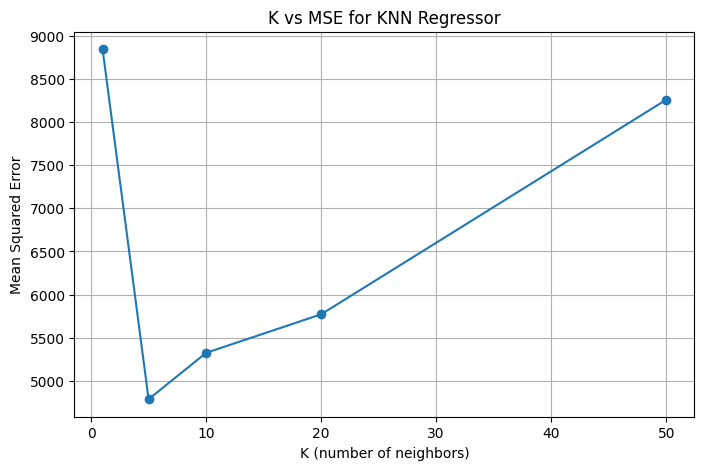

In [7]:
'''Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff. '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Optionally scale features (good practice for distance metrics)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 2a. KNN with Euclidean distance, K=5
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)
print("MSE (Euclidean, K=5):", mse_euc)

# 2b. KNN with Manhattan distance, K=5
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)
print("MSE (Manhattan, K=5):", mse_man)

# 3. Test different K values and plot K vs MSE
k_values = [1, 5, 10, 20, 50]
mse_list = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o')
plt.xlabel('K (number of neighbors)')
plt.ylabel('Mean Squared Error')
plt.title('K vs MSE for KNN Regressor')
plt.grid(True)
plt.show()

Algorithm brute: train_time = 0.0027s, accuracy = 0.7359
Algorithm kd_tree: train_time = 0.0043s, accuracy = 0.7359
Algorithm ball_tree: train_time = 0.0058s, accuracy = 0.7359
Best algorithm: brute


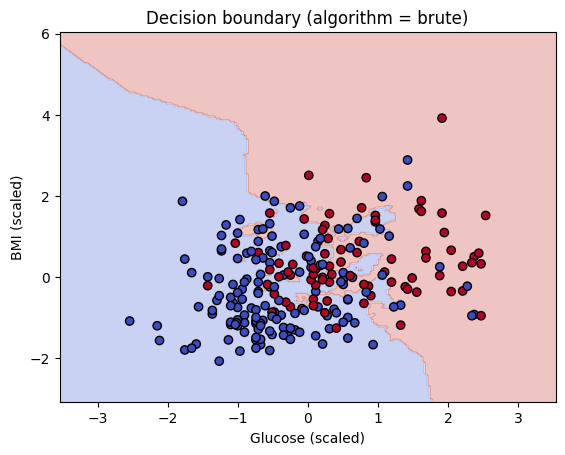

In [9]:
'''Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# 1. Load the Pima Indians Diabetes dataset
# (assuming you load via pandas from CSV – adjust path as needed)
url = "https://raw.githubusercontent.com/ashishpatel26/Pima-Indians-Diabetes-Dataset-Missing-Value-Imputation/master/pima-indians-diabetes.data.csv"
colnames = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigree","Age","Outcome"]
df = pd.read_csv(url, names=colnames)
# 2. Identify missing values: in this dataset some zeroes in certain columns are biologically implausible → treat as missing
cols_with_zero_as_missing = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for c in cols_with_zero_as_missing:
    df[c] = df[c].replace(0, np.nan)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 2. Use KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
# It returns np.ndarray; convert back to DataFrame if you like:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y)

# 3. Train KNN with different algorithms
algorithms = ["brute", "kd_tree", "ball_tree"]
results = {}
for algo in algorithms:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {"train_time": train_time, "accuracy": acc}
    print(f"Algorithm {algo}: train_time = {train_time:.4f}s, accuracy = {acc:.4f}")

# 4. Identify best-performing method (highest accuracy, or best trade-off time/accuracy)
best_algo = max(results, key=lambda a: results[a]["accuracy"])
print("Best algorithm:", best_algo)

# 5. Plot decision boundary using two most important features
# For simplicity pick two features, e.g., "Glucose" and "BMI"
feat_idxs = [X.columns.get_loc("Glucose"), X.columns.get_loc("BMI")]
X2 = X_scaled[:, feat_idxs]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y,
                                                        test_size=0.30,
                                                        random_state=42,
                                                        stratify=y)
clf_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
clf_best.fit(X2_train, y2_train)

# Plot decision boundary
x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Glucose (scaled)")
plt.ylabel("BMI (scaled)")
plt.title(f"Decision boundary (algorithm = {best_algo})")
plt.show()